### Analysing somatic hypermutation
While the V(D)J-recombination process is quite similar between TCR and BCR sequences, there is one fundamental biological process that clearly diverges between both AIR. This process is called {term}`somatic hypermuation (SHM) <SHM>` and only takes place in activated B cells as part of affinity maturation.

Currently, `Scirpy` allows investigating mutations based on differences between observed sequence and inferred germline sequence. This rather simplistic approach is still widely used and powerful as germline inference tools become increasingly better.
We can do this with `scirpy.tl.mutational_load` which requires both a column containing sequence alignment and germline alignment information that are IMGT-gapped ({cite}`Lefranc.2003`).

Setting `region = "IMGT_V_segment"` only differences inside the V-Region according to the IMGT-unique numbering scheme are counted. This can also be changed to `region ="IMGT_V(D)J"` to include the whole sequence alignment and `region = "subregion"` to separately calculate mutations in each distinct region (FWR1, CDR1, FWR2, CDR2, FWR3, CDR3, FWR4). The boolean parameter `frequency` can be used to specify if total or relative counts are desired.

In [65]:
ir.tl.mutational_load(mdata, chains=["VDJ_1"], region="IMGT_V_segment", frequency=True)
ir.tl.mutational_load(mdata, chains=["VDJ_1"], region="subregion", frequency=True)

Stored result in `mdata.obs["airr:VDJ_1_v_segment_mu_freq"]`.
Stored result in `mdata.obs["airr:VDJ_1_fwr1_mu_freq"]`.
Stored result in `mdata.obs["airr:VDJ_1_fwr2_mu_freq"]`.
Stored result in `mdata.obs["airr:VDJ_1_fwr3_mu_freq"]`.
Stored result in `mdata.obs["airr:VDJ_1_fwr4_mu_freq"]`.
Stored result in `mdata.obs["airr:VDJ_1_cdr1_mu_freq"]`.
Stored result in `mdata.obs["airr:VDJ_1_cdr2_mu_freq"]`.
Stored result in `mdata.obs["airr:VDJ_1_cdr3_mu_freq"]`.


The results are stored inside the `.obs` layer and are easily accessible with `Scanpy` or `Seaborn` functionalities for visualization. Below, a violinplot shows the mutation in the heavy chain V-Region grouped by cell cluster annotation. For example, cells labelled as immature or naive B cells experience on average only very little mutation.

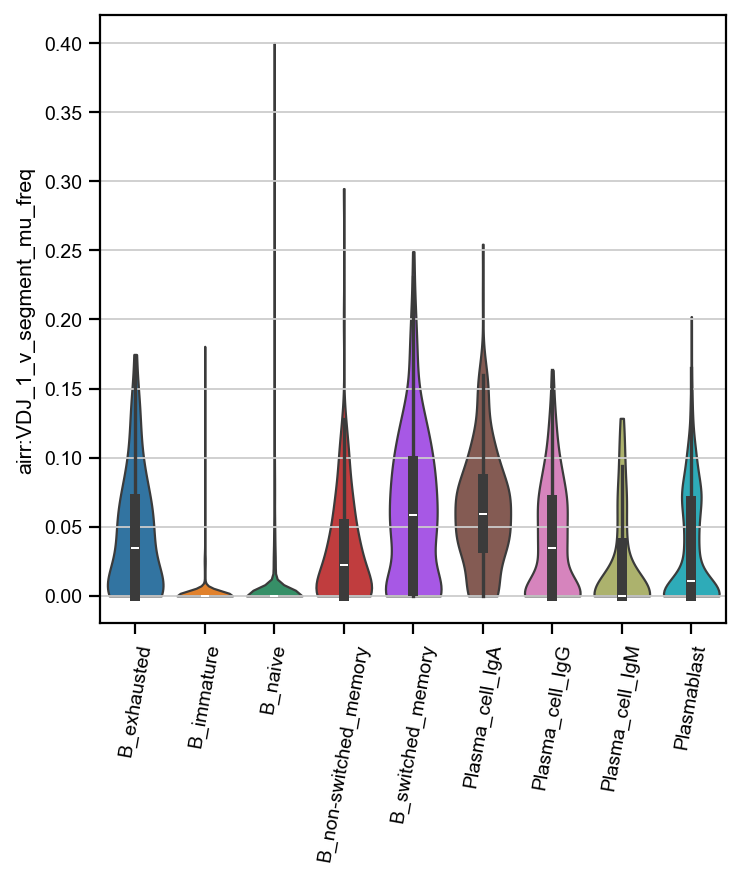

In [67]:
sc.pl.violin(
    mdata, ["airr:VDJ_1_v_segment_mu_freq"], groupby="gex:full_clustering", stripplot=False, inner="box", rotation=80
)

The next violin plots should only serve to highlight the usage of setting `region` to "subregion" as FWR1-4 and CDR1-3 can be accessed independently. Here, it's clear that CDR are more mutated than FWR, which is consistent with the literature.

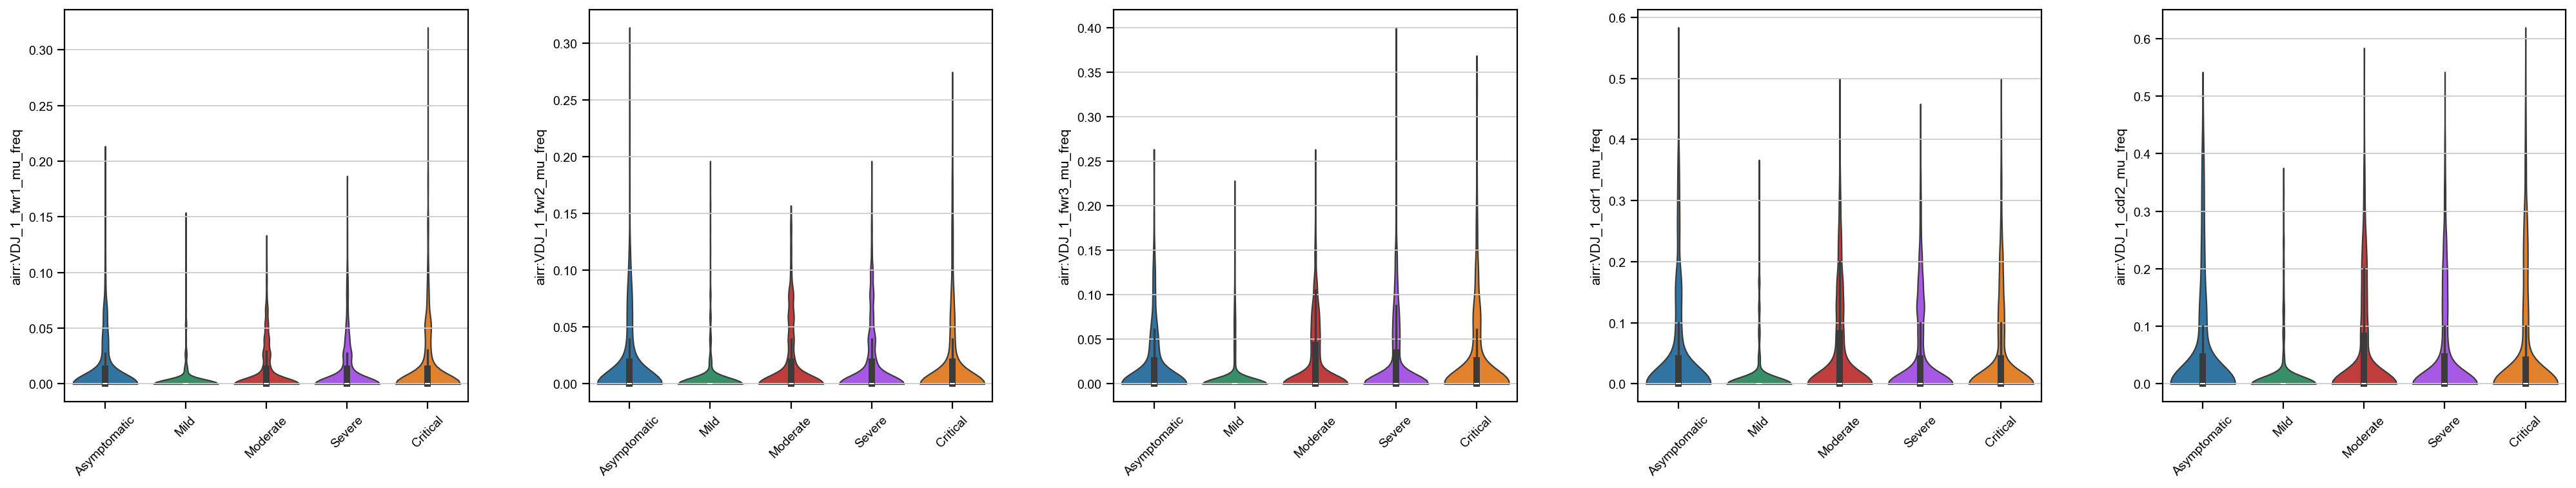

In [69]:
sc.pl.violin(
    mdata,
    [
        "airr:VDJ_1_fwr1_mu_freq",
        "airr:VDJ_1_fwr2_mu_freq",
        "airr:VDJ_1_fwr3_mu_freq",
        "airr:VDJ_1_cdr1_mu_freq",
        "airr:VDJ_1_cdr2_mu_freq",
    ],
    groupby="gex:Status_on_day_collection_summary",
    stripplot=False,
    inner="box",
    rotation=45,
    order=["Asymptomatic", "Mild", "Moderate", "Severe", "Critical"],
)